# **Save this file as studentid1_studentid2_lab#.ipynb**
(Your student-id is the number shown on your student card.)

E.g. if you work with 3 people, the notebook should be named:
12301230_3434343_1238938934_lab1.ipynb.

**This will be parsed by a regexp, so please double check your filename.**

**Only one member of each group has to submit the file to canvas.**

Before you turn this problem in, please make sure everything runs correctly. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Note, that **you are not allowed to use Google Colab**.

**Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your names and email adresses below.**



In [1]:
NAME = "Tom Lieberum"
NAME2 = "Erik Jenner"
NAME3 = ""
EMAIL = "tlieberum@outlook.de"
EMAIL2 = "erik.jenner99@gmail.com"
EMAIL3 = ""

# Lab 1: Linear Regression and Overfitting

### Machine Learning 1, September/October 2020

Notes on implementation:

* You should write your code and answers in this IPython Notebook: http://ipython.org/notebook.html. If you have problems, please contact your teaching assistant.
* Please write your answers right below the questions.
* Among the first lines of your notebook should be "%pylab inline". This imports all required modules, and your plots will appear inline.
* Refer to last week's lab notes, i.e. http://docs.scipy.org/doc/, if you are unsure about what function to use. There are different correct ways to implement each problem!
* For this lab, your regression solutions should be in closed form, i.e., should not perform iterative gradient-based optimization but find the exact optimum directly.
* use the provided test boxes to check if your answers are correct

In [2]:
%pylab inline
plt.rcParams["figure.figsize"] = [20,10]

Populating the interactive namespace from numpy and matplotlib


In [3]:
# This cell makes sure that you have all the necessary libraries installed

import sys
import platform
from importlib.util import find_spec, module_from_spec

def check_newer_version(version_inst, version_nec):
    version_inst_split = version_inst.split('.')
    version_nec_split = version_nec.split('.')
    for i in range(min(len(version_inst_split), len(version_nec_split))):
        if int(version_nec_split[i]) > int(version_inst_split[i]):
            return False
        elif int(version_nec_split[i]) < int(version_inst_split[i]):
            return True
    return True


module_list = [('jupyter', '1.0.0'), 
               ('matplotlib', '2.0.2'), 
               ('numpy', '1.13.1'), 
               ('python', '3.6.2'), 
               ('sklearn', '0.19.0'), 
               ('scipy', '0.19.1'), 
               ('nb_conda', '2.2.1')]

packages_correct = True
packages_errors = []

for module_name, version in module_list:
    if module_name == 'scikit-learn':
        module_name = 'sklearn'
    if 'python' in module_name:
        python_version = platform.python_version()
        if not check_newer_version(python_version, version):
            packages_correct = False
            error = f'Update {module_name} to version {version}. Current version is {python_version}.'
            packages_errors.append(error) 
            print(error)
    else:
        spec = find_spec(module_name)
        if spec is None:
            packages_correct = False
            error = f'Install {module_name} with version {version} or newer, it is required for this assignment!'
            packages_errors.append(error) 
            print(error)
        else:
            x = __import__(module_name)
            if hasattr(x, '__version__') and not check_newer_version(x.__version__, version):
                packages_correct = False
                error = f'Update {module_name} to version {version}. Current version is {x.__version__}.'
                packages_errors.append(error) 
                print(error)

try:
    from google.colab import drive
    packages_correct = False
    error = """Please, don't use google colab!
It will make it much more complicated for us to check your homework as it merges all the cells into one."""
    packages_errors.append(error) 
    print(error)
except:
    pass

packages_errors = '\n'.join(packages_errors)

$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$

## Part 1: Polynomial Regression

### 1.1. Generate periodic data (5 points)
Write a method `gen_sine(N)` that generates toy data like in fig 1.2 of Bishop's book. The method should have a parameter $N$, and should return $N$-dimensional vectors $\bx$ and $\bt$, where $\bx$ contains evenly spaced values from 0 to (including) 2$\pi$, and the elements $t_i$ of $\bt$ are distributed according to:

$$t_i \sim \mathcal{N}(\mu_i, \sigma^2)$$

where $x_i$ is the $i$-th elements of $\bf{x}$, the mean $\mu_i = \sin(x_i)$ and the standard deviation $\sigma = 0.25$. You can make use of `np.random.normal()` (Hint: Double check its input parameters).


In [7]:
def gen_sine(n):
    
    
    ## MY CODE ##
    
    x = np.linspace(0, 2*np.pi, n)
    
    mu = np.sin(x)
    
    t = np.random.normal(loc=mu, scale=np.ones_like(mu)*0.25)
    
    ## END MY CODE ##
    
    return x, t


In [8]:
### Test your function
np.random.seed(42)
N = 10
x, t = gen_sine(N)

assert x.shape == (N,), "the shape of x is incorrect"
assert t.shape == (N,), "the shape of t is incorrect"



### 1.2 Polynomial regression (10 points)

Write a method `fit_polynomial(x, t, M)` that finds the maximum-likelihood solution of an _unregularized_ $M$-th order polynomial for some dataset `x`. The error function to minimize w.r.t. $\bw$ is:

$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt)$

where $\bPhi$ is the _feature matrix_ (or _design matrix_) as explained in Bishop's book at section 3.1.1, $\bt$ is the vector of target values. Your method should return a vector $\bw$ with the maximum-likelihood parameter estimates, as well as the _feature matrix_ $\bPhi$.

In [48]:
def designmatrix(x, M): # it is highly recommended to write a helper function that computes Phi
    ## MY CODE ##
    '''
    Computes the feature matrix Phi
    In:
    x - ndarray, list of dataset values, shape = (N, )
    M - int, maximum order of the polynomial
    Out:
    Phi - ndarray, Phi_i,j = x[i]^j, shape = (N, M+1)
    '''
    
    Phi = np.zeros((len(x),M+1))
    for j in range(M+1):
        Phi[:,j] = x**j
    
    return Phi
    ## END MY CODE ##
    
    
def fit_polynomial(x, t, M):
    ## MY CODE ##
    '''
    Fits a polynomial of order M to the data {x_i, t_i}
    In:
    x - ndarray, dataset values, shape = (N, )
    t - ndarray, dataset targets, shape = (N, )
    M - int, maximum order of the polynomial
    Out:
    w_ml - ndarray, max likelihood weights, shape = (M+1, )
    Phi - ndarray, design matrix, shape = (N, M+1)
    '''
    # compute the design matrix
    Phi = designmatrix(x, M)

    # compute the max likelihood weights
    w_ml = np.matmul(np.matmul(np.linalg.inv(np.matmul(Phi.T, Phi)), Phi.T), t)
    
    ## END MY CODE ##
    
    return w_ml, Phi

In [49]:
### Test your function
N = 10
x = np.linspace(-1, 1, N)
t = 0.3*np.square(x) + 2.5
m = 2
w, Phi = fit_polynomial(x,t,m)

assert w.shape == (m+1,), "The shape of w is incorrect"
assert Phi.shape == (N, m+1), "The shape of Phi is incorrect"



### 1.3 Plot (5 points)
Sample a dataset with $N=10$, and fit four polynomials with $M \in (0, 2, 4, 8)$.
For each value of $M$, plot the prediction function, along with the data and the original sine function. The resulting figure should look similar to fig 1.4 of the Bishop's book. Note that you can use matplotlib's `plt.pyplot(.)` functionality for creating grids of figures.

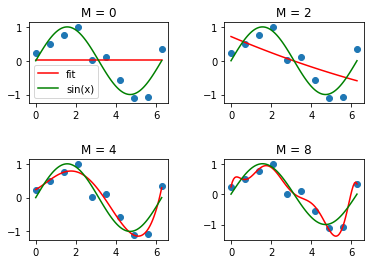

In [129]:
## MY CODE ##

# import for plotting
import matplotlib.pyplot as plt

# init
N = 10
x, t = gen_sine(N)
M = [0,2,4,8]

plot_x = np.linspace(0, 2*np.pi, 100)
plot_t = np.sin(plot_x)
t_pred = []

# perform regression
for m in M:
    w, Phi = fit_polynomial(x,t,m)
    plot_Phi = designmatrix(plot_x, m)
    t_pred.append(np.matmul(plot_Phi, w))

# plot the results
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.4)
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.scatter(x, t)
    plt.plot(plot_x, t_pred[i],color='r', label='fit')
    plt.plot(plot_x, plot_t,color='g', label='sin(x)')
    plt.title(f'M = {M[i]}')
    if i == 0:
        plt.legend()

## END MY CODE ##

### 1.4 Regularized linear regression (15 points)

a) (10 points) Write a method `fit_polynomial_reg(x, t, M, lamb)` that fits a _regularized_ $M$-th order polynomial to the periodic data, as discussed in the lectures, where `lamb` is the regularization term _lambda_. (Note that 'lambda' cannot be used as a variable name in Python since it has a special meaning). The error function to minimize w.r.t. $\bw$:

$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt) + \frac{\lambda}{2} \mathbf{w}^T \mathbf{w}$

For background, see section 3.1.4 of Bishop's book.

The function should return $\bw$ and $\bPhi$.

In [60]:
def fit_polynomial_reg(x, t, m, lamb):
    ## MY CODE ##
    '''
    Fits a polynomial of order M to the data {x_i, t_i}, with L_2 regularization coefficient lamb.
    In:
    x - ndarray, dataset values, shape = (N, )
    t - ndarray, dataset targets, shape = (N, )
    M - int, maximum order of the polynomial
    lamb - float, L_2 regularization coefficient
    Out:
    w_ml - ndarray, max likelihood weights, shape = (M+1, )
    Phi - ndarray, design matrix, shape = (N, M+1)
    '''
    # compute the design matrix
    Phi = designmatrix(x, m)

    # compute the max likelihood weights
    w_ml = np.matmul(np.matmul(np.linalg.inv(lamb * np.eye(m+1) + np.matmul(Phi.T, Phi)), Phi.T), t)
    
    ## END MY CODE ##
    
    return w_ml, Phi
 

In [61]:
### Test your function
N = 10
x = np.linspace(-1, 1, N)
t = 0.3*np.square(x) + 2.5
m = 2
lamb = 0.1
w, Phi = fit_polynomial_reg(x,t,m, lamb)

assert w.shape == (m+1,), "The shape of w is incorrect"
assert Phi.shape == (N, m+1), "The shape of w is incorrect" 



b) (5 points) What changes do you notice in $\bw$ and $\bPhi$ after introducing the regularization term? Why is this happening? 

(Write no more than 5 lines. For example, you can consider the simple test case with $t = 0.3*x^2 + 2.5$)

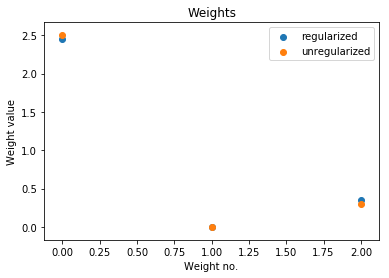

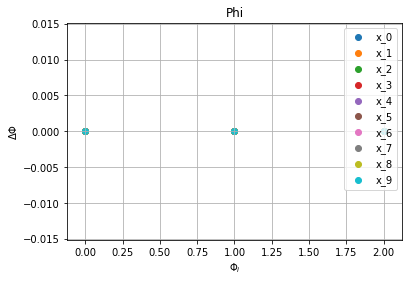

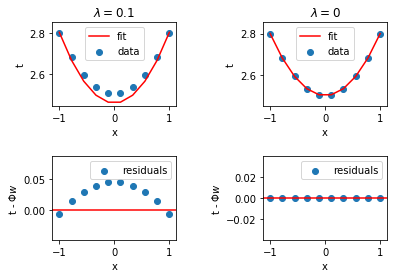

In [105]:
## This code is for inspecting the difference between the unregularized and the regularized model
## For an answer to question 4 scroll past this cell.

N = 10
x = np.linspace(-1, 1, N)
t = 0.3*np.square(x) + 2.5
m = 2
lamb = 0.1

w, Phi = fit_polynomial_reg(x, t, m, lamb)
w_unreg, Phi_unreg = fit_polynomial(x, t, m)

# plotting the weights
plt.figure()
plt.scatter(np.arange(m+1), w, label='regularized')
plt.scatter(np.arange(m+1), w_unreg, label='unregularized')
plt.title('Weights')
plt.xlabel('Weight no.')
plt.ylabel('Weight value')
plt.legend()

# plotting the change in Phi, should be zero
plt.figure()
plt.grid()
plt.title('Phi')
plt.xlabel(r'$\Phi_i$')
plt.ylabel(r'$\Delta \Phi$')
for i in range(N):
    plt.scatter(np.arange(m+1), Phi_unreg[i,:]-Phi[i,:], label=f'x_{i}')
plt.legend()

# plotting the data and the fits
fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.7)
plt.subplot(2,2,1)
plt.scatter(x, t, label='data')
plt.plot(x, np.matmul(Phi, w), label='fit', color='r')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.title(r'$\lambda = 0.1$')

plt.subplot(2,2,2)
plt.scatter(x, t, label='data')
plt.plot(x, np.matmul(Phi_unreg, w_unreg), label='fit', color='r')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.title(r'$\lambda = 0$')

# plotting the residuals
plt.subplot(2,2,3)
plt.scatter(x, t-np.matmul(Phi, w), label='residuals')
plt.axhline(y=0, color='r')
plt.legend()
plt.xlabel('x')
plt.ylabel(r't - $\Phi w$')

plt.subplot(2,2,4)
plt.scatter(x, t-np.matmul(Phi_unreg, w_unreg), label='residuals')
plt.axhline(y=0, color='r')
plt.legend()
plt.xlabel('x')
plt.ylabel(r't - $\Phi w$')


ANSWER TO QUESTION 1.4:

We see that in the regularized case, we get less extreme weights (this especially shows if we allow higher order polynomials). However, this means that in the case we are looking at the regularized model has a lower bias in favor of an increased quadratic coefficient. Although this leads to a suboptimal fit, it minimizes the regularized loss function. In Phi we see no change since it is independent of the weights and therefore not impacted by the regularization.







### 1.5 Model selection by cross-validation (15 points)
Use cross-validation to find a good choice of $M$ and $\lambda$, given a dataset of $N=10$ datapoints generated with `gen_sine(10)`. You should write a function that tries (loops over) a reasonable range of choices of $M$ and $\lambda$, and returns the choice with the best cross-validation error. In this case you use $K=5$ folds.

You can let $M \in (0, 1, ..., 10)$, and let $\lambda \in (e^{-10}, e^{-9}, ..., e^{0})$.

a) (5 points) First of all, write a method `pred_error(x_train, x_valid, t_train, t_valid, M, lamb)` that compares the prediction of your method `fit_polynomial_reg` for a given set of parameters $M$ and $\lambda$ to `t_valid`. It should return the prediction error for a single fold.

In [109]:
def pred_error(x_train, x_valid, t_train, t_valid, M, reg):
    ## MY CODE ##
    '''
    Computes validation error of linear regression with polynomials of order M and L2 regularization coeff reg
    In:
    x_train - ndarray, training values
    x_valid - ndarray, validation values
    t_train - ndarray, training targets
    t_valid - ndarray, validation targets
    M - int, max order of polynomials
    reg - float, L2 regularization coeff
    Out:
    pred_err - mean squared validation error
    '''
    
    # perform linear regression
    w, Phi = fit_polynomial_reg(x_train, t_train, M, reg)
    
    # compute predictions
    Phi_valid = designmatrix(x_valid, M)
    t_pred = np.matmul(Phi_valid, w)
    
    # compute mean squared error
    pred_err = 0.5 * np.mean((t_pred - t_valid)**2)
    
    ## END MY CODE ##
    
    return pred_err


In [110]:
### Test your function
N = 10
x = np.linspace(-1, 1, N)
t = 0.3*np.square(x) + 2.5
M = 2
reg = 0.1
pred_err = pred_error(x[:-2], x[-2:], t[:-2], t[-2:], M, reg)

assert pred_err < 0.001, "pred_err is too big"



b) (10 points) Now write a method find_best_m_and_lamb(x, t) that finds the best values for $M$ and $\lambda$. The method should return the best $M$ and $\lambda$. To get you started, here is a method you can use to generate indices of cross-validation folds.

In [111]:
def kfold_indices(N, k):
    all_indices = np.arange(N,dtype=int)
    np.random.shuffle(all_indices)
    idx = [int(i) for i in np.floor(np.linspace(0,N,k+1))]
    train_folds = []
    valid_folds = []
    for fold in range(k):
        valid_indices = all_indices[idx[fold]:idx[fold+1]]
        valid_folds.append(valid_indices)
        train_folds.append(np.setdiff1d(all_indices, valid_indices))
    return train_folds, valid_folds


In [117]:
def find_best_m_and_lamb(x, t):
    ## MY CODE ##
    '''
    Uses crossvalidation to find a good choice for M and lambda from a pre-selected array
    In:
    x - ndarray, values
    t - ndarray, targets
    Out:
    M_best - int, best M
    lamb_best - float, best lambda
    '''
    
    # init choice for M, lambda, and K
    M = np.arange(11)
    Lamb = np.exp(-M[::-1])
    K = 5 # number of crossvalidation folds
    
    # get fold indices:
    ## TODO: Should this be done anew for every (m, lamb)?
    train_folds, valid_folds = kfold_indices(len(x), K)
    
    # try out every combination
    M_best, lamb_best = 0, 0.
    best_error = np.inf
    
    for m in M:
        for lamb in Lamb:
            error = 0
            for fold in range(K):
                # get data for this fold
                x_train = x[train_folds[fold]]
                x_valid = x[valid_folds[fold]]
                t_train = t[train_folds[fold]]
                t_valid = t[valid_folds[fold]]
                
                # compute error for this fold
                error += pred_error(x_train, x_valid, t_train, t_valid, m, lamb) / K

            # update best combination, if lower crossvalidation error
            if error < best_error:
                best_error = error
                M_best, lamb_best = m, lamb
            
    ## END MY CODE ##
    
    return M_best, lamb_best


In [118]:
### This is not an empty cell (You don't need to care about it).

### 1.6 Why grid search? (5 points)

Grid search is an commonly-used technique to tune hyper-parameters in a model.
Considering the case described in the previous step of this assignment, running a grid search over the possible parameter values (10 possible values for both $M$ and $\lambda$), results in two nested loops exploring $10 \times 10 = 100$ different configurations for the model. 

a) (3 points) Why do we want to optimize by changing the two hyperparameters at the same time, and not in a sequential way? We could initialise all parameters randomly, fix one parameter at a time and iterate over the other, resulting in only $10 + 10 = 20$ experiments!

The problem would be that there could be an initialization where the sequential optimization leads to suboptimal solutions.

Optimizing for M first, we only get the optimal M *for the current lambda*. Then, optimizing for lambda we will get the lambda that is optimal *for that M*. This M and lambda however don't necessarily lead to a global optimum.

For more complex models, the number of combinations easily explodes with the number of parameters. For example, with 5 parameters we would run $10 \times 10 \times 10 \times 10 \times 10 = 100,000$ experiments.

b) (2 points) Try to think or find in literature one alternative to grid search to tune hyper-parameters more efficiently. Explain very briefly (2-3 lines max) how this method avoids the combinatorial explosion we have see in grid search.

### TODO

### 1.7 Plot best cross-validated fit (5 points)

For some dataset with $N = 10$, plot the model with the optimal $M$ and $\lambda$ according to the cross-validation error, using the method you just wrote. In addition, the plot should show the dataset itself and the function that we try to approximate. Let the plot make clear which $M$ and $\lambda$ were found.

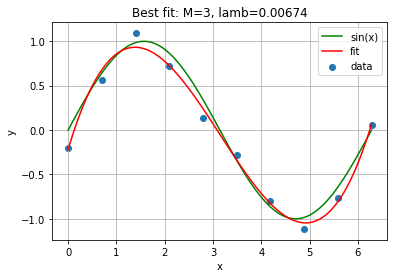

In [124]:
## MY CODE ##

# init
N = 10
x, t = gen_sine(N)

# compute best m and lamb
M_best, lamb_best = find_best_m_and_lamb(x, t)

# perform regression using the best parameters
w, Phi = fit_polynomial_reg(x, t, M_best, lamb_best)

# plotting
plot_Phi = designmatrix(plot_x, M_best)
plot_x = np.linspace(0, 2*np.pi, 100)
plot_t = np.sin(plot_x)

plt.figure()
plt.scatter(x, t, label='data')
plt.plot(plot_x, plot_t, label='sin(x)', color='g')
plt.plot(plot_x, np.matmul(plot_Phi, w), label='fit', color='r')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Best fit: M={M_best}, lamb={lamb_best:1.3}')
plt.grid()

## END MY CODE ##

## Part 2: Bayesian Linear (Polynomial) Regression

### 2.1 Sine 2 (5 points)

Write a function `gen_sine2(N)` that behaves identically to `gen_sine(N)` except that the generated values $x_i$ are not linearly spaced, but drawn from a uniform distribution between $0$ and $2 \pi$.

In [133]:
def gen_sine2(n):
    ## MY CODE ##
    '''
    Draws uniform points from [0,2pi] and evaluates sin(x) at these points
    In:
    n - int, number of points to generate
    Out:
    x - ndarray, values in [0,2pi]
    t - ndarray, sin(x)
    '''
    
    # sample n points 
    x = np.random.uniform(0, 2*np.pi, n)
    
    # compute t
    t = np.sin(x)
    
    ## END MY CODE ##
    
    return x, t


In [134]:
### Test your function
np.random.seed(42)
N = 10
x, t = gen_sine2(N)

assert x.shape == (N,), "the shape of x is incorrect"
assert t.shape == (N,), "the shape of t is incorrect"



### 2.2 Compute Posterior (15 points)

You're going to implement a Bayesian linear regression model, and fit it to the periodic data. Your regression model has a zero-mean isotropic Gaussian prior over the parameters, governed by a single (scalar) precision parameter $\alpha$, i.e.:

$$p(\bw \;|\; \alpha) = \mathcal{N}(\bw \;|\; 0, \alpha^{-1} \bI)$$

The covariance and mean of the posterior are given by:

$$\bS_N= \left( \alpha \bI + \beta \bPhi^T \bPhi \right)^{-1} $$
$$\bm_N = \beta\; \bS_N \bPhi^T \bt$$

where $\alpha$ is the precision of the predictive distribution, and $\beta$ is the noise precision. 
See MLPR chapter 3.3 for background.

Write a method `fit_polynomial_bayes(x, t, M, alpha, beta)` that returns the mean $\bm_N$ and covariance $\bS_N$ of the posterior for a $M$-th order polynomial. In addition it should return the design matrix $\bPhi$. The arguments `x`, `t` and `M` have the same meaning as in question 1.2.

In [135]:
def fit_polynomial_bayes(x, t, M, alpha, beta):
    ## MY CODE ##
    '''
    Compute the mean and covariance of the posterior for a M-th order polynomial
    In:
    x - ndarray, training values
    t - ndarray, training targets
    M - int, max order of the polynomial
    alpha - float, prior precision parameter
    beta - float, noise precision parameter
    Out:
    m - ndarray, mean of the posterior
    S - ndarray, covariance of the posterior
    Phi - ndarray, feature matrix of x
    '''
    
    # compute Phi
    Phi = designmatrix(x, M)
    
    # compute covariance
    S = np.linalg.inv(alpha * np.eye(M + 1) + beta * np.matmul(Phi.T, Phi))
    
    # compute mean
    m = beta * np.matmul(S, np.matmul(Phi.T, t))
    
    
    ## END MY CODE ##
    
    return m, S, Phi


In [136]:
### Test your function
N = 10
x = np.linspace(-1, 1, N)
t = 0.3*np.square(x) + 2.5
M = 2
alpha = 0.6
beta = 16
m, S, Phi = fit_polynomial_bayes(x, t, M, alpha, beta)

assert m.shape == (M+1,), "the shape of m is incorrect" 
assert S.shape == (M+1, M+1), "the shape of S is incorrect"
assert Phi.shape == (N, M+1), "the shape of Phi is incorrect"



### 2.3 Prediction (10 points)

The predictive distribution of Bayesian linear regression is:

$$ p(t \;|\; \bx, \bt, \alpha, \beta) = \mathcal{N}(t \;|\; \bm_N^T \phi(\bx), \sigma_N^2(\bx))$$

$$ \sigma_N^2 = \frac{1}{\beta} + \phi(\bx)^T \bS_N \phi(\bx) $$

where $\phi(\bx)$ are the computed features for a new datapoint $\bx$, and $t$ is the predicted variable for datapoint $\bx$. 

Write a function that `predict_polynomial_bayes(x, m, S, beta)` that returns the predictive mean, variance and design matrix $\bPhi$ given a new datapoint `x`, posterior mean `m`, posterior variance `S` and a choice of model variance `beta`.

In [171]:
def predict_polynomial_bayes(x, m, S, beta):
    ## MY CODE ##
    '''
    In:
    x - ndarray, new datapoints
    m - ndarray, mean of the posterior
    S - ndarray, covariance of the posterior
    beta - float, noise precision parameter
    Out:
    mean - float, predictive mean
    sigma - float, predictive variance
    Phi - ndarray, feature matrix of x
    '''
    
    # compute Phi
    Phi = designmatrix(x, len(m)-1)
    
    # compute mean 
    mean = np.matmul(Phi, m)
    
    # compute variance
    sigma = np.zeros_like(x)
    for i in range(len(x)):
        sigma[i] = 1/beta + np.dot(Phi[i], np.matmul(S, Phi[i]))

        
    ## END MY CODE ##
    
    return mean, sigma, Phi


In [172]:
### Test your function
np.random.seed(42)
N = 10
x = np.linspace(-1, 1, N)
m = np.random.rand(3)
S = np.random.rand(3, 3)
beta = 16
mean, sigma, Phi = predict_polynomial_bayes(x, m, S, beta)

assert mean.shape == (N,), "the shape of mean is incorrect"
assert sigma.shape == (N,), "the shape of sigma is incorrect"
assert Phi.shape == (N, m.shape[0]), "the shape of Phi is incorrect"



### 2.4 Plot predictive distribution (10 points)

a) (5 points) Generate 10 datapoints with `gen_sine2(10)`. Compute the posterior mean and covariance for a Bayesian polynomial regression model with $M=4$, $\alpha=\frac{2}{5}$ and $\beta=\frac{1}{0.25^2}$.
Plot the Bayesian predictive distribution, where you plot (for $x$ between 0 and $2 \pi$) $t$'s predictive mean and the predictive standard deviation using `plt.fill_between(..., alpha=0.1)` (the alpha argument induces transparency).

Include the datapoints in your plot.


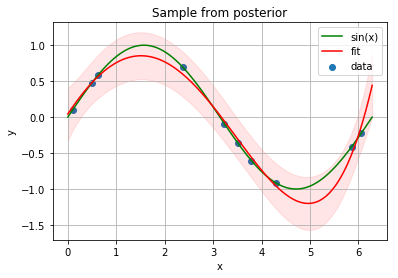

In [187]:
## MY CODE ##

# generate ten datapoints
x, t = gen_sine2(10)

# parameters
M = 4
alpha = 0.4
beta = 16

# perform fit
m, S, Phi = fit_polynomial_bayes(x, t, M, alpha, beta)

# compute posterior for more points to make a better plot
plot_x = np.linspace(0, 2*np.pi, 100)
plot_t = np.sin(plot_x)
mean, sigma, Phi = predict_polynomial_bayes(plot_x, m, S, beta)

plt.figure()
plt.scatter(x, t, label='data')
plt.plot(plot_x, plot_t, label='sin(x)', color='g')
plt.plot(plot_x, mean, label='fit', color='r')
plt.fill_between(plot_x, mean-np.sqrt(sigma), mean+np.sqrt(sigma), alpha=0.1, color='r')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample from posterior')

## END MY CODE ##

b) (5 points) For a second plot, draw 100 samples from the parameters' posterior distribution. Each of these samples is a certain choice of parameters for 4-th order polynomial regression. 
Display each of these 100 polynomials.


(200, 5)


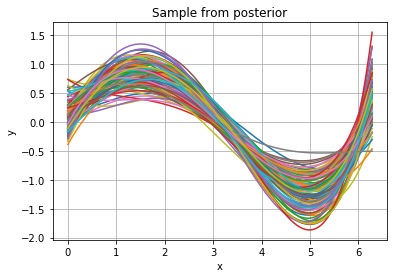

In [188]:
## MY CODE ##

# draw 100 samples
N = 100
w = np.random.multivariate_normal(m, S, N)

x = np.linspace(0, 2*np.pi, 200)
Phi = designmatrix(x, w.shape[1]-1)
print(Phi.shape)
t = np.matmul(Phi, w.T)
plt.figure()
for i in range(N):
    plt.plot(x, t[:,i])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample from posterior')
## END MY CODE ##

### 2.5 Additional questions (10 points)

a) (5 points) Why is $\beta=16$ the best choice of $\beta$ in section 2.4?



YOUR ANSWER HERE

b) (5 points) What problems do we face when it comes to choosing basis functions in linear models?

The choice of basis functions limits the model expressivity in that we can only express functions that can be represented as linear combinations of our basis functions. Using more and more basis functions does increase the model expressivity but at the same time increases the number of parameters that need to be learned and can lead to overfitting.
